In [ ]:
Write a program to implementing and evaluating a Linear Regression model

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9
Mean Squared Error (MSE): 13.935094218381238
R-squared (R²) Score: 0.5414861959526603
✅ Full results saved as 'tv_sales_predictions_full.csv'.


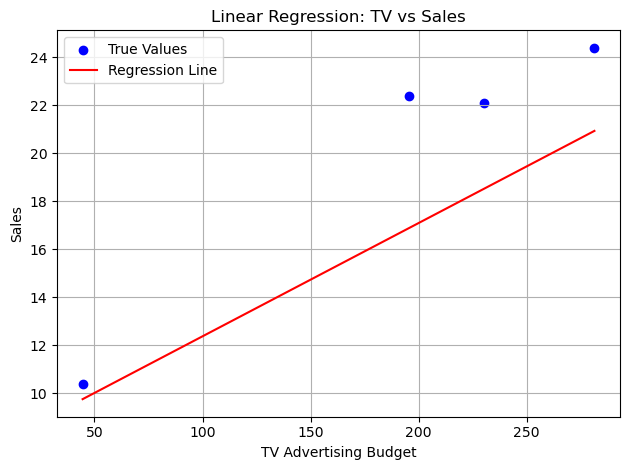

In [51]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from a CSV file
data = pd.read_csv(r"C:\Users\vivek\Downloads\tv_sales_predictions_full(1).csv")

# Print first few rows to check data
print(data.head())  # Changed from print(data) to show just the top rows

# Define the independent and dependent variables
X = data[['TV']]  # Independent variable must be 2D for sklearn
y = data['Sales'] # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²) Score: {r2}")

# Combine true vs predicted values for full output
results = pd.DataFrame({
    'TV': X_test['TV'].values,
    'Actual Sales': y_test.values,
    'Predicted Sales': y_pred
})

# Sort results by TV for clean plotting and viewing
results = results.sort_values(by='TV')

# Save results to CSV with full data
results.to_csv('tv_sales_predictions_full.csv', index=False)
print("✅ Full results saved as 'tv_sales_predictions_full.csv'.")

# Visualize the results
plt.scatter(results['TV'], results['Actual Sales'], color='blue', label='True Values')
plt.plot(results['TV'], results['Predicted Sales'], color='red', label='Regression Line')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('Linear Regression: TV vs Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
Write a program to implementing and evaluating a Logistic Regression model.

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv(r"C:\Users\vivek\Downloads\logistic_predictions_detailed.csv")

# Separate features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', report)

# Create detailed DataFrame for export
results_df = X_test.copy()
results_df['Actual'] = y_test.values
results_df['Predicted'] = y_pred

# Save CSV
results_df.to_csv('logistic_predictions_full.csv', index=False)
print("✅ File saved: logistic_predictions_full.csv")


Accuracy: 1.0000
Confusion Matrix:
 [[1 0]
 [0 3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

✅ File saved: logistic_predictions_full.csv


In [ ]:
Write a program to implementing and evaluating a Decision Tree classifier.

✅ Accuracy: 1.0000

🧮 Confusion Matrix:
[[1 0]
 [0 1]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



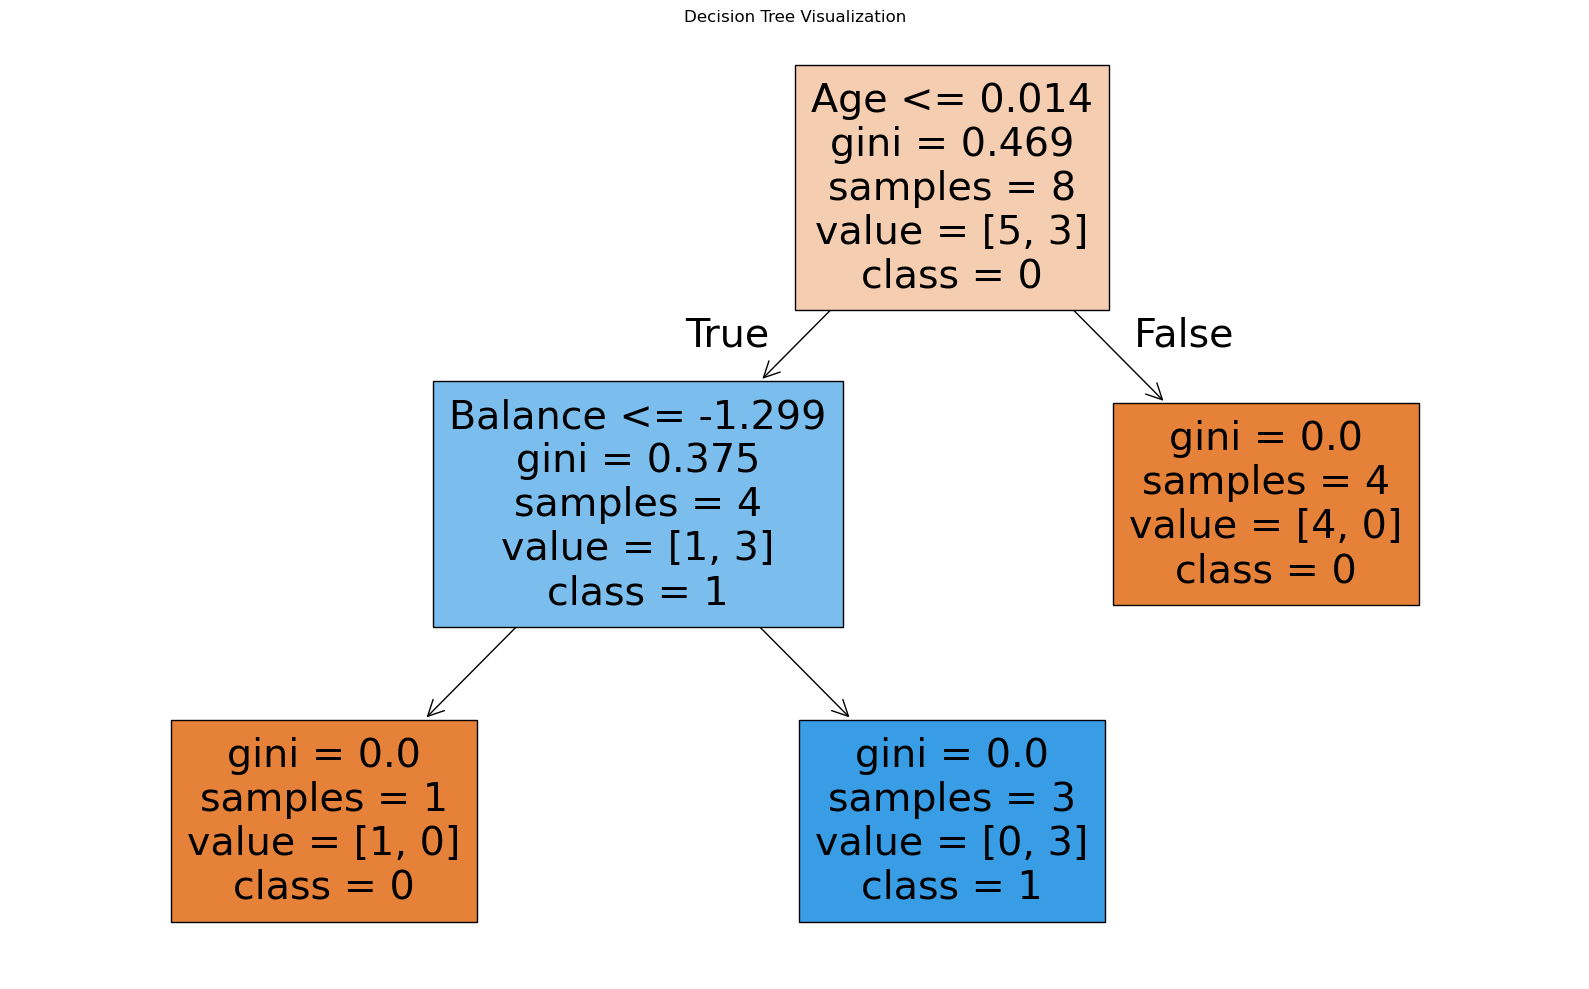

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset from CSV
df = pd.read_csv(r"C:\Users\vivek\Downloads\Tree classifier.csv")  # Update path if needed

# Separate features and target
X = df.iloc[:, :-1]  # All columns except last
y = df.iloc[:, -1]   # Last column as target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features (optional for Decision Trees)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation results
print(f'✅ Accuracy: {accuracy:.4f}')
print('\n🧮 Confusion Matrix:')
print(conf_matrix)
print('\n📊 Classification Report:')
print(report)

# Visualize the decision tree
plt.figure(figsize=(16, 10))
plot_tree(
    model,
    filled=True,
    feature_names=df.columns[:-1],
    class_names=[str(cls) for cls in np.unique(y)]
)
plt.title("Decision Tree Visualization")
plt.tight_layout()
plt.show()


In [ ]:
Write a program to implementing Clustering using the K-means algorithm

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


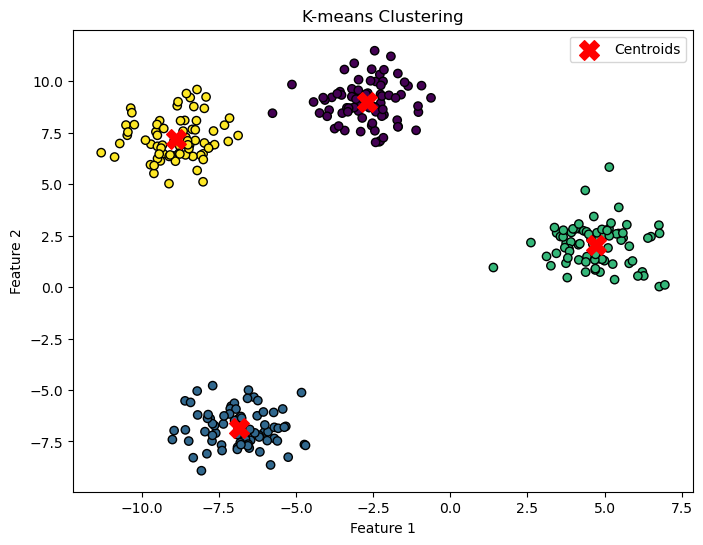

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic data (for demonstration)
# Generating 300 data points with 4 centers (clusters)
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Step 2: Apply the K-means algorithm
# Set the number of clusters to 4 (since we generated data with 4 centers)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Step 3: Get the centroids and labels for the clusters
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Step 4: Visualize the clusters
plt.figure(figsize=(8, 6))

# Scatter plot of data points with colors corresponding to cluster labels
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')

# Mark the centroids with a red 'X'
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')

# Add titles and labels
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the legend
plt.legend()

# Display the plot
plt.show()


In [ ]:
Write a program to implementing Dimensionality reduction using PCA.

   ip_count  session_duration  failed_logins  is_intrusion
0        52                45              9             1
1        93                41              6             1
2        15                29              8             1
3        72                15              6             0
4        61                45              0             1
Explained variance ratio: [0.35709525 0.33124948]


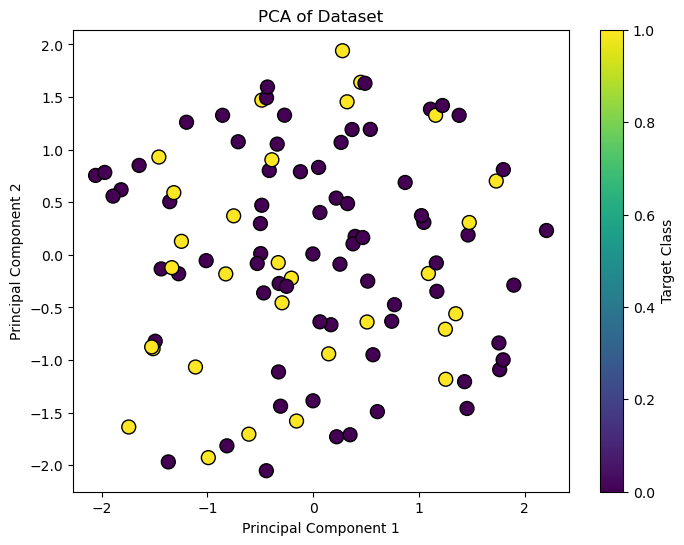

In [41]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load CSV file
df = pd.read_csv(r"C:\Users\vivek\Downloads\PCA.csv")

# Check the first few rows of the dataset
print(df.head())

# Step 1: Separate features (X) and target (y)
X = df.iloc[:, :-1].values  # All rows, all columns except the last one
y = df.iloc[:, -1].values   # Last column is the target

# Step 2: Standardize the dataset (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Explained variance ratio (how much variance is captured by each component)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Step 5: Plot the 2D PCA result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title("PCA of Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label='Target Class')
plt.show()


In [ ]:
Write a program to implementing Bagging using Random Forest.

In [21]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load CSV file
df = pd.read_csv(r"C:\Users\vivek\Downloads\Random_Forest_Train_Data.csv")

# Print the first few rows
print(df.head())

# Strip column names to remove leading/trailing spaces (common issue)
df.columns = df.columns.str.strip()

# Step 1: Handle missing values
df = df.dropna()

# Step 2: Convert categorical features to numeric (if any)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != df.columns[-1]]  # exclude target column

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 3: Separate features and target
X = df.iloc[:, :-1].values  # Features (all columns except last)
y = df.iloc[:, -1].values   # Target (last column)

# Step 4: Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = rf_classifier.predict(X_test)

# Step 8: Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest on test data: {accuracy * 100:.2f}%')


   Age  Gender  Salary  CreditScore    Balance Geography  Exited
0   42  Female   58000          619       0.00    France       1
1   41  Female   52000          608   83807.86     Spain       0
2   42  Female   79000          502  159660.80    France       1
3   39  Female   79000          699       0.00    France       0
4   43    Male   60000          850  125510.82   Germany       0
Accuracy of Random Forest on test data: 33.33%


In [ ]:
Write a program to implementing Boosting using AdaBoost

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Load dataset
df = pd.read_csv(r"C:\Users\vivek\Downloads\AdaBoost.csv")
print("First 5 rows of the dataset:")
print(df.head())

# Step 2: Handle missing values (if any)
df = df.dropna()  # Or use df.fillna(method='ffill') or df.fillna(df.mean())

# Step 3: Separate features and target
X = df.iloc[:, :-1].values  # All rows, all columns except the last one
y = df.iloc[:, -1].values   # Last column as target

# Step 4: Encode target variable if needed
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 5: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Initialize AdaBoost classifier with a DecisionTree as weak learner
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

# Train the model
adaboost_classifier.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = adaboost_classifier.predict(X_test)

# Step 8: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of AdaBoost on test data: {accuracy * 100:.2f}%')


First 5 rows of the dataset:
   feature1  feature2  feature3 label
0         5         1        10   yes
1         7         2        15    no
2         8         3        14   yes
3         2         4        13    no
4         3         2         9   yes
Accuracy of AdaBoost on test data: 33.33%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
Write a program to implementing SVM for classification tasks.

Confusion Matrix:
[[31  0]
 [ 0 29]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        29

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



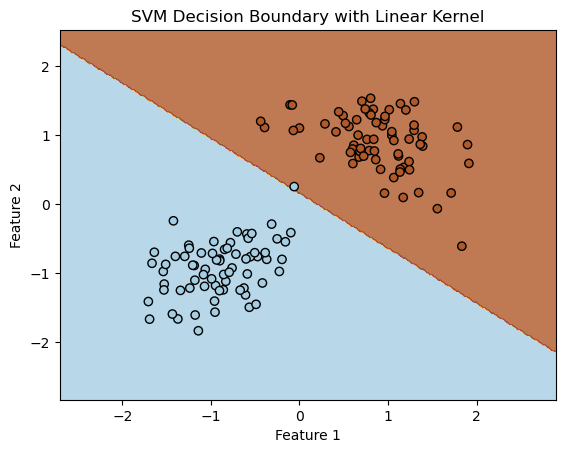

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load CSV
df = pd.read_csv(r"C:\Users\vivek\Downloads\SVM for classification tasks.csv")

# Split features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

# Step 6: Visualize Decision Boundary (for 2D data only)
if X.shape[1] == 2:
    h = .02  # Step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict over the mesh grid
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    plt.title('SVM Decision Boundary with Linear Kernel')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


In [ ]:
Write a program to implement a simple neural network using TensorFlow/Keras.

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {test_acc:.4f}")


Epoch 1/5
1688/1688 - 7s - 4ms/step - accuracy: 0.9246 - loss: 0.2664 - val_accuracy: 0.9670 - val_loss: 0.1218
Epoch 2/5
1688/1688 - 6s - 3ms/step - accuracy: 0.9660 - loss: 0.1164 - val_accuracy: 0.9718 - val_loss: 0.0937
Epoch 3/5
1688/1688 - 12s - 7ms/step - accuracy: 0.9759 - loss: 0.0811 - val_accuracy: 0.9745 - val_loss: 0.0865
Epoch 4/5
1688/1688 - 8s - 5ms/step - accuracy: 0.9813 - loss: 0.0617 - val_accuracy: 0.9723 - val_loss: 0.0887
Epoch 5/5
1688/1688 - 6s - 4ms/step - accuracy: 0.9855 - loss: 0.0474 - val_accuracy: 0.9778 - val_loss: 0.0798
✅ Test Accuracy: 0.9750


In [43]:
pip install pymongo

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/903.2 kB ? eta -:--:--
   --------------------------------------- 903.2/903.2 kB 10.3 MB/s eta 0:00:00


In [ ]:
Write a program to implementing CRUD operations in MongoDB

In [45]:
# Install pymongo if not already installed
# pip install pymongo

from pymongo import MongoClient

# Connect to MongoDB server (default: localhost:27017)
client = MongoClient("mongodb://localhost:27017/")

# Use the 'mydatabase' database and 'users' collection
db = client['mydatabase']
collection = db['users']

# ----- CREATE operation -----
user_data = {
    'name': 'John Doe',
    'age': 30,
    'email': 'john.doe@example.com'
}
result = collection.insert_one(user_data)
print(f"✅ Document inserted with ID: {result.inserted_id}")

# ----- READ operation -----
user = collection.find_one({"name": "John Doe"})
print("📄 Found user:", user)

# ----- UPDATE operation -----
update_result = collection.update_one(
    {"name": "John Doe"},
    {"$set": {"age": 31}}
)
print(f"🛠️ Documents matched: {update_result.matched_count}, modified: {update_result.modified_count}")

# ----- DELETE operation -----
delete_result = collection.delete_one({"name": "John Doe"})
print(f"🗑️ Documents deleted: {delete_result.deleted_count}")


✅ Document inserted with ID: 684b5053c2a1054c31681119
📄 Found user: {'_id': ObjectId('684b5053c2a1054c31681119'), 'name': 'John Doe', 'age': 30, 'email': 'john.doe@example.com'}
🛠️ Documents matched: 1, modified: 1
🗑️ Documents deleted: 1


In [ ]:
Write a program to implementing with NLTK: Tokenization, stemming, and lemmatization

In [49]:
# Install NLTK if not already installed
# pip install nltk

import nltk

# Download necessary resources
nltk.download('punkt')        # For tokenization
nltk.download('wordnet')      # For lemmatization
nltk.download('stopwords')    # For stopword filtering (optional)

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Sample text for demonstration
text = "NLTK is a great toolkit for Natural Language Processing. Tokenization, Stemming, and Lemmatization are important tasks."

# ----- Tokenization -----
tokens = word_tokenize(text)
print("🔹 Tokens:", tokens)

# ----- Stemming -----
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in tokens]
print("🔹 Stemmed words:", stemmed_words)

# ----- Lemmatization (default POS = noun) -----
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
print("🔹 Lemmatized words (as nouns):", lemmatized_words)

# ----- Lemmatization with POS = verb -----
lemmatized_verbs = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
print("🔹 Lemmatized words (as verbs):", lemmatized_verbs)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\vivek/nltk_data'
    - 'C:\\ProgramData\\anaconda3\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\vivek\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [47]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
